In [ ]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDAS').getOrCreate()

In [2]:
Total_Clean_data = spark.read.csv('Total_Clean_data.csv', inferSchema=True, header=True)
Total_Clean_data.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)
 |-- Bin_Global_Sales: double (nullable = true)



In [3]:
Total_Clean_data.registerTempTable('Total_Clean_data')
spark.sql("SELECT ROUND(SUM(Global_Sales),2) AS TT_GlobalSales,\
                        Platform FROM Total_Clean_data Group by Platform Order by TT_GlobalSales DESC").show(10)

+--------------+--------+
|TT_GlobalSales|Platform|
+--------------+--------+
|       1233.46|     PS2|
|         969.6|    X360|
|        949.27|     PS3|
|        909.81|     Wii|
|        818.62|      DS|
|        727.39|      PS|
|        305.62|     GBA|
|        291.67|     PSP|
|        278.07|     PS4|
|         254.7|      PC|
+--------------+--------+
only showing top 10 rows



In [10]:
Total_Clean_data.registerTempTable('Total_Clean_data')
spark.sql("SELECT ROUND(SUM(Global_Sales),2) AS TT_GlobalSales,\
                        Genre FROM Total_Clean_data Group by Genre Order by TT_GlobalSales DESC").show(10)

+--------------+------------+
|TT_GlobalSales|       Genre|
+--------------+------------+
|       1722.83|      Action|
|       1309.24|      Sports|
|        1026.2|     Shooter|
|        923.79|Role-Playing|
|        829.13|    Platform|
|        789.87|        Misc|
|        726.76|      Racing|
|        444.05|    Fighting|
|        389.69|  Simulation|
|        242.21|      Puzzle|
+--------------+------------+
only showing top 10 rows



In [13]:
Total_Clean_data.registerTempTable('Total_Clean_data')
spark.sql("SELECT ROUND(SUM(Global_Sales),2) AS TT_GlobalSales,\
                        Name FROM Total_Clean_data Group by Name Order by TT_GlobalSales DESC").show(10,False)

+--------------+------------------------------+
|TT_GlobalSales|Name                          |
+--------------+------------------------------+
|82.74         |Wii Sports                    |
|55.92         |Grand Theft Auto V            |
|45.31         |Super Mario Bros.             |
|35.84         |Tetris                        |
|35.82         |Mario Kart Wii                |
|33.0          |Wii Sports Resort             |
|31.37         |Pokemon Red/Pokemon Blue      |
|30.83         |Call of Duty: Modern Warfare 3|
|30.01         |New Super Mario Bros.         |
|29.72         |Call of Duty: Black Ops II    |
+--------------+------------------------------+
only showing top 10 rows



In [4]:
Total_Clean_data = Total_Clean_data.toPandas()

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

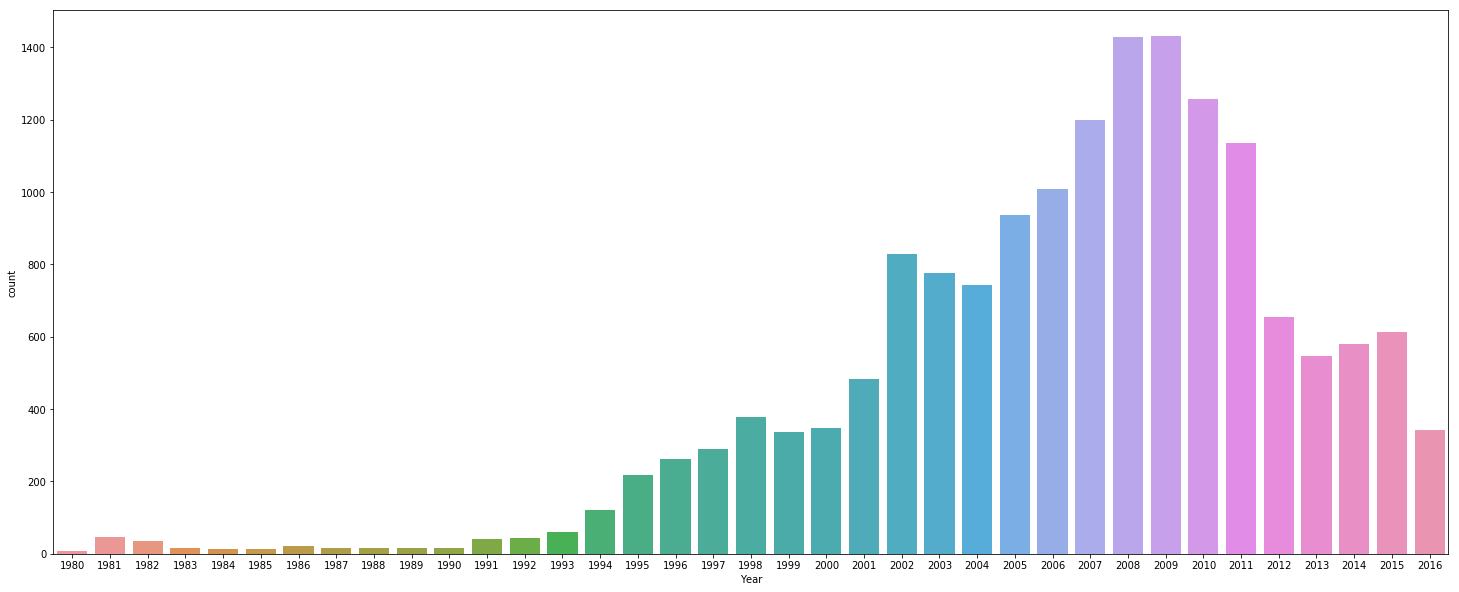

In [23]:
plt.figure(figsize = (25,10))
sns.countplot(x="Year",data = Total_Clean_data)
plt.show()

In [ ]:
Total_Clean_data = spark.createDataFrame(Total_Clean_data)

In [6]:
Total_Clean_data.registerTempTable('Total_Clean_data')
spark.sql("SELECT ROUND(SUM(NA_Sales),2) AS TT_NASales,\
                        Platform FROM Total_Clean_data Group by Platform Order by TT_NASales DESC").show(10)

+----------+--------+
|TT_NASales|Platform|
+----------+--------+
|    594.33|    X360|
|    572.92|     PS2|
|    497.37|     Wii|
|     388.9|     PS3|
|    388.26|      DS|
|    334.71|      PS|
|    182.06|      XB|
|    178.43|     GBA|
|    138.91|     N64|
|    131.94|      GC|
+----------+--------+
only showing top 10 rows



In [7]:
Total_Clean_data.registerTempTable('Total_Clean_data')
spark.sql("SELECT ROUND(SUM(EU_Sales),2) AS TT_EUSales,\
                        Platform FROM Total_Clean_data Group by Platform Order by TT_EUSales DESC").show(10)

+----------+--------+
|TT_EUSales|Platform|
+----------+--------+
|    340.47|     PS3|
|    332.63|     PS2|
|     278.0|    X360|
|    264.35|     Wii|
|    212.38|      PS|
|    194.05|      DS|
|    137.35|      PC|
|     123.7|     PS4|
|     72.49|     GBA|
|     67.16|     PSP|
+----------+--------+
only showing top 10 rows



In [8]:
Total_Clean_data.registerTempTable('Total_Clean_data')
spark.sql("SELECT ROUND(SUM(JP_Sales),2) AS TT_JPSales,\
                        Platform FROM Total_Clean_data Group by Platform Order by TT_JPSales DESC").show(10)

+----------+--------+
|TT_JPSales|Platform|
+----------+--------+
|    175.02|      DS|
|    139.78|      PS|
|    137.54|     PS2|
|    116.55|    SNES|
|     98.65|     NES|
|      97.3|     3DS|
|     85.12|      GB|
|     79.13|     PS3|
|     75.85|     PSP|
|     68.28|     Wii|
+----------+--------+
only showing top 10 rows



In [14]:
Total_Clean_data.registerTempTable('Total_Clean_data')
spark.sql("SELECT ROUND(SUM(NA_Sales),2) AS TT_NASales,\
                        Name FROM Total_Clean_data Group by Name Order by TT_NASales DESC").show(10, False)

+----------+------------------------------+
|TT_NASales|Name                          |
+----------+------------------------------+
|41.49     |Wii Sports                    |
|32.48     |Super Mario Bros.             |
|26.93     |Duck Hunt                     |
|26.17     |Tetris                        |
|23.46     |Grand Theft Auto V            |
|17.01     |Call of Duty: Black Ops       |
|15.99     |Super Mario World             |
|15.85     |Mario Kart Wii                |
|15.75     |Wii Sports Resort             |
|15.58     |Call of Duty: Modern Warfare 3|
+----------+------------------------------+
only showing top 10 rows



In [11]:
Total_Clean_data.registerTempTable('Total_Clean_data')
spark.sql("SELECT ROUND(SUM(EU_Sales),2) AS TT_EUSales,\
                        Name FROM Total_Clean_data Group by Name Order by TT_EUSales DESC").show(10)

+----------+--------------------+
|TT_EUSales|                Name|
+----------+--------------------+
|     29.02|          Wii Sports|
|     23.04|  Grand Theft Auto V|
|     12.88|      Mario Kart Wii|
|      12.4|             FIFA 15|
|     11.29|Call of Duty: Mod...|
|     11.29|             FIFA 16|
|     11.14|             FIFA 14|
|     11.05|Call of Duty: Bla...|
|     11.01|   Wii Sports Resort|
|      11.0|          Nintendogs|
+----------+--------------------+
only showing top 10 rows



In [13]:
Total_Clean_data.registerTempTable('Total_Clean_data')
spark.sql("SELECT ROUND(SUM(JP_Sales),2) AS TT_JPSales,\
                        Name FROM Total_Clean_data Group by Name Order by TT_JPSales DESC").show(10,False)

+----------+----------------------------------+
|TT_JPSales|Name                              |
+----------+----------------------------------+
|10.22     |Pokemon Red/Pokemon Blue          |
|7.2       |Pokemon Gold/Pokemon Silver       |
|6.96      |Super Mario Bros.                 |
|6.5       |New Super Mario Bros.             |
|6.04      |Pokemon Diamond/Pokemon Pearl     |
|6.03      |Tetris                            |
|5.65      |Pokemon Black/Pokemon White       |
|5.4       |Dragon Quest VII: Warriors of Eden|
|5.38      |Pokemon Ruby/Pokemon Sapphire     |
|5.33      |Animal Crossing: Wild World       |
+----------+----------------------------------+
only showing top 10 rows



In [3]:
Total_Clean_data.registerTempTable('Total_Clean_data')
spark.sql("SELECT ROUND(SUM(Global_Sales),2) AS TT_GlobalSales,\
                        Publisher FROM Total_Clean_data Group by Publisher Order by TT_GlobalSales DESC").show(10,False)

+--------------+----------------------------+
|TT_GlobalSales|Publisher                   |
+--------------+----------------------------+
|1784.43       |Nintendo                    |
|1093.39       |Electronic Arts             |
|721.41        |Activision                  |
|607.2         |Sony Computer Entertainment |
|473.25        |Ubisoft                     |
|399.3         |Take-Two Interactive        |
|340.44        |THQ                         |
|278.56        |Konami Digital Entertainment|
|270.66        |Sega                        |
|253.65        |Namco Bandai Games          |
+--------------+----------------------------+
only showing top 10 rows



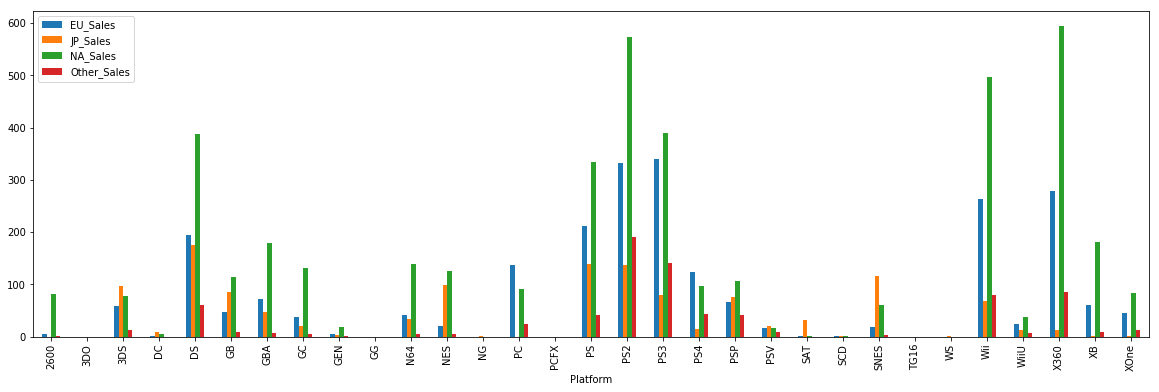

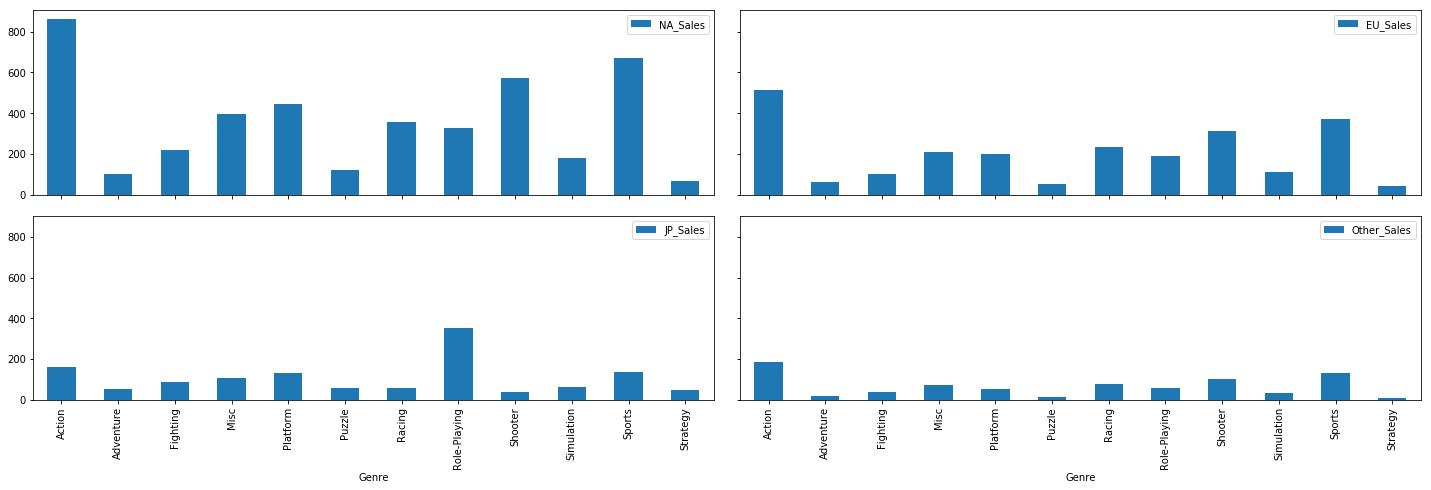

In [7]:
Total_Clean_data.pivot_table(index='Platform',values = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']\
                             ,aggfunc='sum').plot.bar(figsize=(20,6))
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharex=True,sharey=True)
fig.tight_layout()
Total_Clean_data.pivot_table(index='Genre',values=['NA_Sales'],aggfunc='sum').plot.bar(ax=axes[0][0])
Total_Clean_data.pivot_table(index='Genre',values=['EU_Sales'],aggfunc='sum').plot.bar(ax=axes[0][1])
Total_Clean_data.pivot_table(index='Genre',values=['JP_Sales'],aggfunc='sum').plot.bar(ax=axes[1][0])
Total_Clean_data.pivot_table(index='Genre',values=['Other_Sales'],aggfunc='sum').plot.bar(ax=axes[1][1])

In [1]:
!git config --global user.name "PPTV-666"
!git config --global user.email "zpen689@aucklanduni.ac.nz"

In [ ]:
!ssh-keygen -t rsa -C "zpen689@aucklanduni.ac.nz"